In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/full.regular.txt', delim_whitespace=True)

In [4]:
data.describe()

,0,0.000,0.000.1,0.000.2,1,1.1,1.2,1.3,1.4,0.1
count,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1079133.0
mean,1.502021e+02,5.965603e+00,7.416875e+00,9.035807e+00,1.504170e-02,7.553749e-02,2.246748e-01,8.234490e-01,2.491768e+00,0.0
std,1.267608e+02,8.436803e-01,2.182458e+00,3.029510e+00,1.221747e-01,2.767069e-01,4.954270e-01,1.201071e+00,2.386876e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.500000e+01,5.467000e+00,5.278000e+00,6.272000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.180000e+02,5.795000e+00,7.869000e+00,8.905000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0
75%,2.140000e+02,6.563000e+00,9.370000e+00,1.184800e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.0
max,1.015000e+03,7.826000e+00,1.159000e+01,1.492200e+01,2.000000e+00,4.000000e+00,6.000000e+00,1.000000e+01,1.800000e+01,0.0


In [5]:
y = data.iloc[:, 2]
X = data.iloc[:, 3:11]

In [6]:
X_samll = X.iloc[0:100000,0:]
y_samll = y.iloc[0:100000]

In [7]:
y.value_counts()

C
H    459325
C    377953
E    241855
Name: count, dtype: int64

In [8]:
target_encoding = []
for x in y_samll:
  if x == "H":
    target_encoding.append(0)
  elif x == "C":
    target_encoding.append(1)
  else:
      target_encoding.append(2)
target_encoding = np.array(target_encoding)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_samll, target_encoding)

In [10]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_samll,target_encoding)

In [11]:
X_over.shape

(119978, 8)

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_samll, target_encoding)

In [13]:
X_sm.shape

(127227, 8)

In [14]:
X_total =pd.concat([X_over,X_sm],axis=0)
Y_total =pd.concat([pd.DataFrame(y_over),pd.DataFrame(y_sm)],axis=0)

In [15]:
X_total.shape

(247205, 8)

In [16]:
Y_total.shape

(247205, 1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X_total, np.array(Y_total).ravel(), test_size=0.30, random_state=0)
print("The train shape is: ",X_train.shape )
print("The test shape is: ",X_test.shape )
print("The target train shape is: ",y_train.shape )
print("The target test shape is: ",y_test.shape )

The train shape is:  (173043, 8)
The test shape is:  (74162, 8)
The target train shape is:  (173043,)
The target test shape is:  (74162,)


In [22]:
!pip install scikit-plot

In [23]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [21]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=80,
algorithm="SAMME.R", learning_rate=0.9)
ada_clf.fit(X_train, y_train)
y_pred_trainsm = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test)
accuracy_trainsm = accuracy_score(y_train, y_pred_trainsm)
accuracysm = accuracy_score(y_test, y_pred)
print("Accuracysm testing: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm: %.2f%%" % (accuracy_trainsm * 100.0))

Accuracysm: 92.34%
Accuracy trainsm: 99.04%


In [24]:
probas = ada_clf.predict_proba(X_test)

In [25]:
y_test = y_test.reshape(y_test.shape[0])
y_pred = y_pred.reshape(y_test.shape[0])
print(y_test.shape,y_pred.shape)


(74162,) (74162,)


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

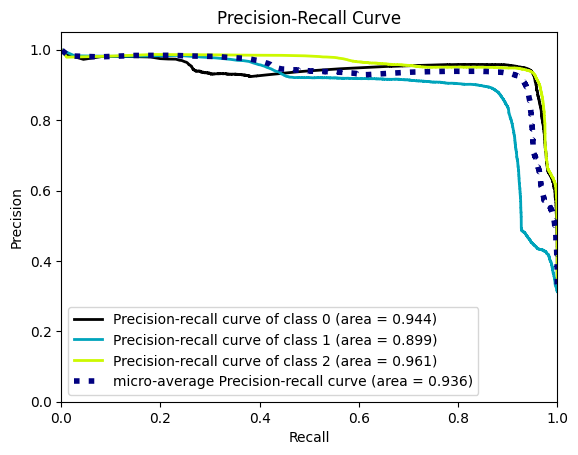

In [26]:
skplt.metrics.plot_precision_recall(y_test,probas)

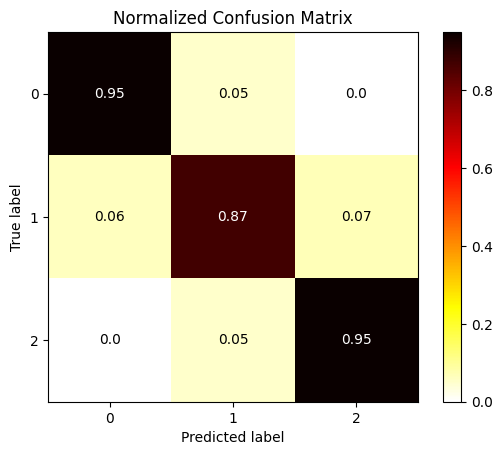

In [27]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True, cmap='hot_r')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


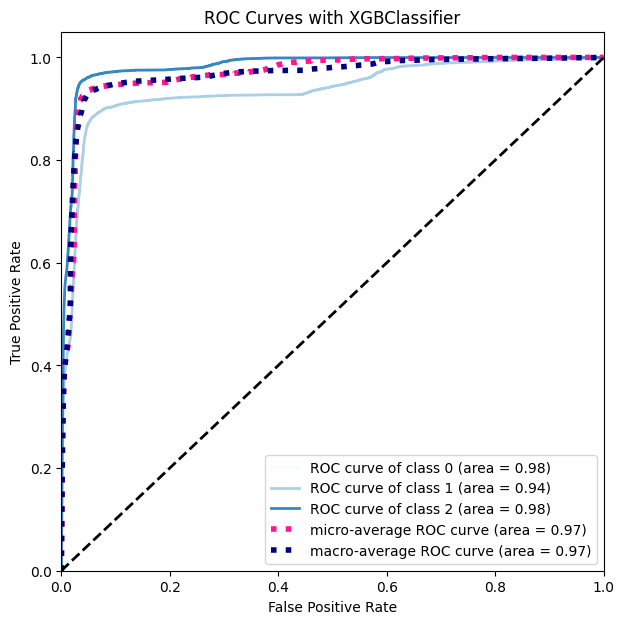

In [28]:
skplt.metrics.plot_roc_curve(y_test,probas,title="ROC Curves with XGBClassifier", cmap='Blues', figsize=[7,7])
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(penalty='l2',max_iter=00,C=1,solver='lbfgs',l1_ratio=None)
log_clf.fit(X_train, y_train)
y_pred_trainsmlog_clf = log_clf.predict(X_train)
y_predsmlog_clf = log_clf.predict(X_test)
accuracy_trainsm = accuracy_score(y_train, y_pred_trainsmlog_clf)
accuracysm = accuracy_score(y_test, y_predsmlog_clf)
print("Accuracysm of log_clf: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of log_clf: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracysm of log_clf: 34.48%
Accuracy trainsm of log_clf: 34.30%


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [31]:
model=XGBClassifier(n_estimators=80,max_depth=20,learning_rate=0.9)

# ***Hypertuning model***

In [34]:
param_grid = {'max_depth': [3, 10, 20],
              'learning_rate': [0.1, 0.5, 0.9]}
base_estimator = XGBClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=2,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train, y_train)
print(sh.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=24, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [35]:
model=XGBClassifier(n_estimators=24,max_depth=20,learning_rate=0.5)

In [36]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd

In [37]:
model.fit(X_train, y_train)
y_pred_trainsm = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_trainsm = accuracy_score(y_train, y_pred_trainsm)
accuracysm = accuracy_score(y_test, y_pred)
print("Accuracysm testing: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm: %.2f%%" % (accuracy_trainsm * 100.0))

Accuracysm testing: 93.77%
Accuracy trainsm: 99.64%


In [40]:
probas = model.predict_proba(X_test)

In [41]:
y_test = y_test.reshape(y_test.shape[0])
y_pred = y_pred.reshape(y_test.shape[0])
print(y_test.shape,y_pred.shape)


(74162,) (74162,)


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

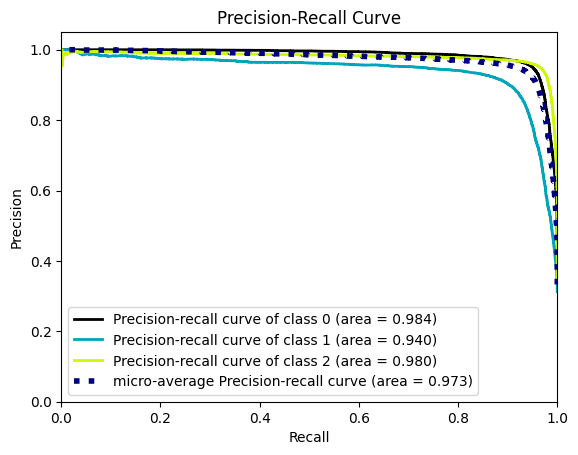

In [42]:
skplt.metrics.plot_precision_recall(y_test,probas)

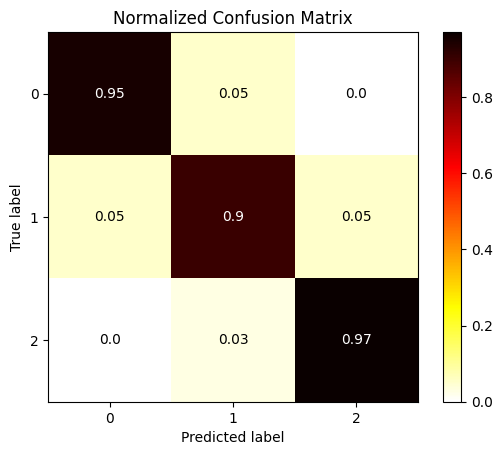

In [43]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True, cmap='hot_r')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


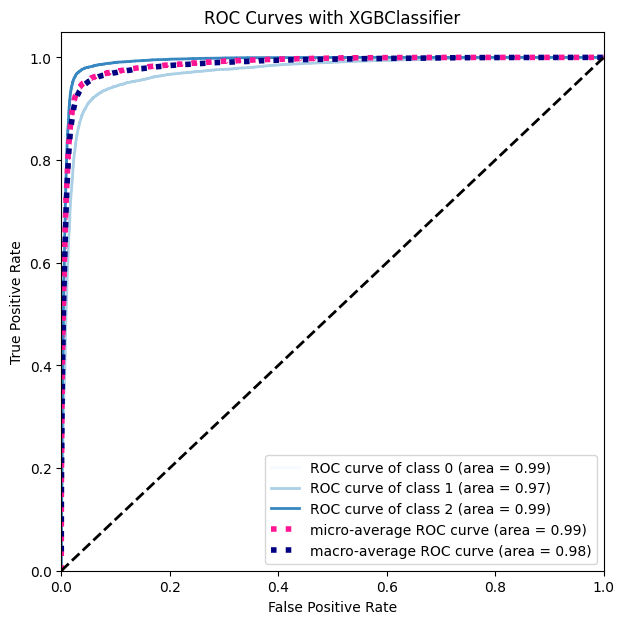

In [44]:
skplt.metrics.plot_roc_curve(y_test,probas,title="ROC Curves with XGBClassifier", cmap='Blues', figsize=[7,7])
plt.show()